In [2]:
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt

# LaTeX helper for matrices
def latex_matrix(M):
    if np.shape(M)[0] < 20 and np.shape(M)[1] < 20:
        return (
            r"\begin{bmatrix}"
            + r" \\ ".join(
                [" & ".join(f"{x:.3f}" for x in row) for row in M]
            )
            + r"\end{bmatrix}"
        )
    else:
        return r"\begin{bmatrix} \text{matrix too large to display} \end{bmatrix}"

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frobenius norm of A: 11.789826122551595
Sum of squared normalized singular values: 1.0
Effective Schmidt number: = 1.0602535257641441


<IPython.core.display.Math object>

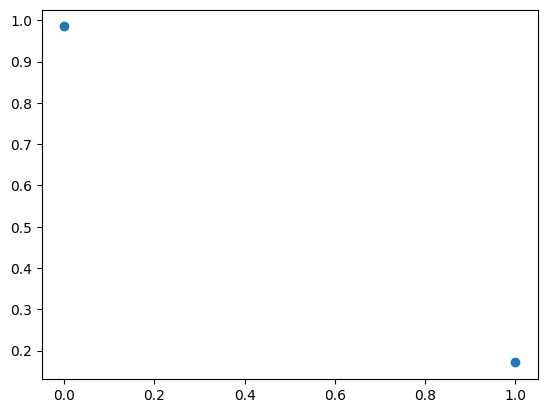

In [19]:
# ----------------------------
# Input matrix (example)
# ----------------------------
A = np.array([[1, 5],
              [0, 10],
              [2, 3]])


# ----------------------------
# Singular Value Decomposition
# ----------------------------
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# ----------------------------
# Reconstruction (exact)
# ----------------------------
Sigma = np.diag(S)
A_reconstructed = U @ Sigma @ Vt

# ----------------------------
# LaTeX display
# ----------------------------
display(Math(r"\mathbf{A} = " + latex_matrix(A)))
display(Math(r"\mathbf{U} = " + latex_matrix(U)))
display(Math(
    r"\boldsymbol{\Sigma} = "
    + latex_matrix(Sigma)
))
display(Math(r"\mathbf{V}^\top = " + latex_matrix(Vt)))
display(Math(
    r"\mathbf{A}_{\mathrm{reconstructed}} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\top = "
    + latex_matrix(A_reconstructed)
))
err = np.linalg.norm(A - A_reconstructed)
display(Math(
    r"\|\mathbf{A} - \mathbf{A}_{\mathrm{reconstructed}}\| = "
    + f"{err:.3e}"
))

display(Math(
    r"\mathbf{U}\mathbf{V}^\top = "
    + latex_matrix(U @ Vt)
))

# ----------------------------
# Normalized (Schmidt) version
# ----------------------------
# Frobenius norm of A
norm_A = np.sqrt(np.sum(S**2))

# Normalized singular values (Schmidt amplitudes)
S_norm = S / norm_A
Sigma_norm = np.diag(S_norm)

print("Frobenius norm of A:",
      norm_A)

print("Sum of squared normalized singular values:",
      np.sum(S_norm**2))

# Effective Schmidt number
lambda_ = S_norm**2
K_eff = 1.0 / np.sum(lambda_**2)

print("Effective Schmidt number: =", K_eff)

# ----------------------------
# LaTeX display
# ----------------------------
display(Math(
    r"\boldsymbol{\Sigma}_{\mathrm{norm}} = "
    + latex_matrix(Sigma_norm)
))

plt.plot(S_norm, 'o')

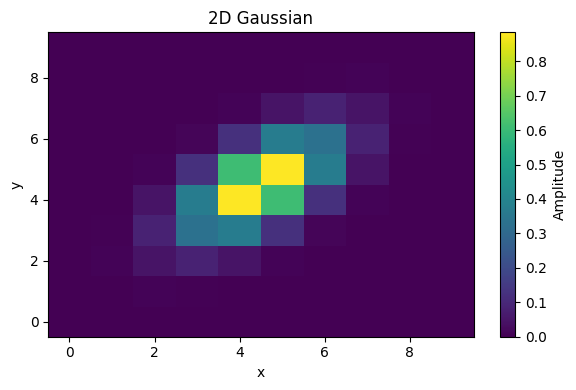

In [25]:
def gaussian_2d(
    nx=10, ny=10,
    xi=-1.0, xf=1.0,
    yi=-1.0, yf=1.0,
    sigmax=0.2, sigmay=0.2,
    x0=None, y0=None,
    r=15
):
    """
    2D Gaussian on a rectangular grid.

    Parameters
    ----------
    nx, ny : int
        Number of points along x and y.
    xi, xf : float
        Initial and final x coordinates.
    yi, yf : float
        Initial and final y coordinates.
    sigmax, sigmay : float
        Standard deviations along x and y.
    x0, y0 : float or None
        Center of the Gaussian. If None, uses the domain center.
    r : float
        Correlation (tilt) parameter.

    Returns
    -------
    X, Y : 2D arrays
        Coordinate grids.
    f : 2D array
        Gaussian evaluated on the grid.
    """

    x = np.linspace(xi, xf, nx)
    y = np.linspace(yi, yf, ny)
    X, Y = np.meshgrid(x, y, indexing="ij")

    if x0 is None:
        x0 = 0.5 * (xi + xf)
    if y0 is None:
        y0 = 0.5 * (yi + yf)

    dx = X - x0
    dy = Y - y0

    f = np.exp(
        -(
            dx**2 / (2 * sigmax**2)
            + dy**2 / (2 * sigmay**2)
            - r * dx * dy
        )
    )

    return f

# Generate the 500x500 Gaussian matrix
G = gaussian_2d()

# Plot the Gaussian matrix
plt.figure(figsize=(6, 4))
plt.imshow(
    G,
    origin="lower",
    aspect="auto"
)
plt.colorbar(label="Amplitude")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Gaussian")
plt.tight_layout()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frobenius norm of A: 1.7835654138606616
Sum of squared normalized singular values: 1.0
Effective Schmidt number: = 1.2505239130738253


<IPython.core.display.Math object>

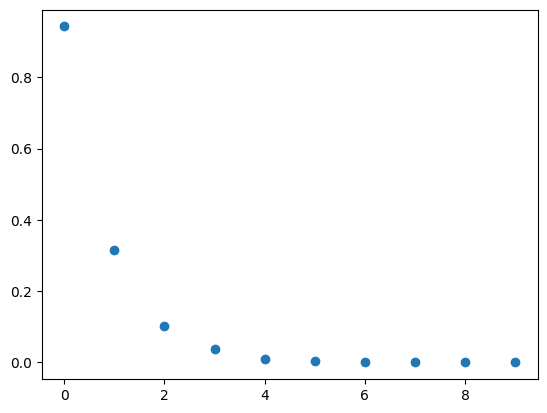

In [26]:
# ----------------------------
# Input matrix (example)
# ----------------------------
A = G

# ----------------------------
# Singular Value Decomposition
# ----------------------------
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# ----------------------------
# Reconstruction (exact)
# ----------------------------
Sigma = np.diag(S)
A_reconstructed = U @ Sigma @ Vt

# ----------------------------
# LaTeX display
# ----------------------------
display(Math(r"\mathbf{A} = " + latex_matrix(A)))
display(Math(r"\mathbf{U} = " + latex_matrix(U)))
display(Math(
    r"\boldsymbol{\Sigma} = "
    + latex_matrix(Sigma)
))
display(Math(r"\mathbf{V}^\top = " + latex_matrix(Vt)))
display(Math(
    r"\mathbf{A}_{\mathrm{reconstructed}} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\top = "
    + latex_matrix(A_reconstructed)
))
err = np.linalg.norm(A - A_reconstructed)
display(Math(
    r"\|\mathbf{A} - \mathbf{A}_{\mathrm{reconstructed}}\| = "
    + f"{err:.3e}"
))

display(Math(
    r"\mathbf{U}\mathbf{V}^\top = "
    + latex_matrix(U @ Vt)
))

# ----------------------------
# Normalized (Schmidt) version
# ----------------------------
# Frobenius norm of A
norm_A = np.sqrt(np.sum(S**2))

# Normalized singular values (Schmidt amplitudes)
S_norm = S / norm_A
Sigma_norm = np.diag(S_norm)

print("Frobenius norm of A:",
      norm_A)

print("Sum of squared normalized singular values:",
      np.sum(S_norm**2))

# Effective Schmidt number
lambda_ = S_norm**2
K_eff = 1.0 / np.sum(lambda_**2)

print("Effective Schmidt number: =", K_eff)

# ----------------------------
# LaTeX display
# ----------------------------
display(Math(
    r"\boldsymbol{\Sigma}_{\mathrm{norm}} = "
    + latex_matrix(Sigma_norm)
))

plt.plot(S_norm, 'o')